# Attention Distribution Plots

In [1]:
import os

import e2cnn

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
import PIL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import configparser as ConfigParser

import utils
# Ipmport various network architectures
from networks import AGRadGalNet, DNSteerableLeNet, DNSteerableAGRadGalNet #e2cnn module only works in python3.7+
# Import various data classes
from datasets import FRDEEPF
from datasets import MiraBest_full, MBFRConfident, MBFRUncertain, MBHybrid
from datasets import MingoLoTSS, MLFR, MLFRTest

from sklearn.metrics import classification_report, roc_curve, auc
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')

### Attention Map Distributions

In [8]:
config_names = [
    "bowles2021mirabest.cfg",
    #"scaife2021mirabest.cfg",
    "e2attentionmirabest.cfg",
    
    "bowles2021mingo.cfg",
    #"scaife2021mingo.cfg", 
    "e2attentionmingo.cfg"
]

repititions = 50

# Read in Config
cfg = config_names[1]
config_name = "configs/"+cfg
config = ConfigParser.ConfigParser(allow_no_value=True)
config.read(config_name)

# Load in data
test_data_loader = utils.data.load(config, train=False, augmentation='random rotation', data_loader=True)    # Prepare sources and labels
for idx, r in enumerate(range(repititions)):    
    for idy, (test_data, l) in enumerate(test_data_loader):
        test_data = test_data.numpy()
        if idx+idy==0:
            sources = test_data
            labels = np.asarray(l)
        else:
            sources = np.append(sources, test_data, axis=0)
            labels = np.append(labels, np.asarray(l), axis=0)

Files already downloaded and verified


In [9]:
# Read in Config
cfg = config_names[1]
config_name = "configs/"+cfg
config = ConfigParser.ConfigParser(allow_no_value=True)
config.read(config_name)

# Load in model
model = utils.utils.load_model(config, load_model='best', device=device)

# Produce Attention Maps
amap, amap_originals = utils.attention.attentions_func(
        sources, 
        model, 
        device=device, 
        layer_no=3, 
        layer_name_base='attention', 
        mean=False)

/raid/scratch/mbowles/EquivariantSelfAttention/venv/lib/python3.8/site-packages/e2cnn/nn/modules/r2_conv/basisexpansion_singleblock.py:61: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:30.)
  sampled_basis = sampled_basis[mask, ...]


In [10]:
def sums_and_diff(a,b):
    a_sum = a.sum(0)
    b_sum = b.sum(0)
    diff = a_sum-b_sum
    return a_sum, b_sum, diff

fri_sources = sources[np.where(labels==0)]
frii_sources= sources[np.where(labels==1)]

fri_amap = amap[np.where(labels==0)]
frii_amap= amap[np.where(labels==1)]

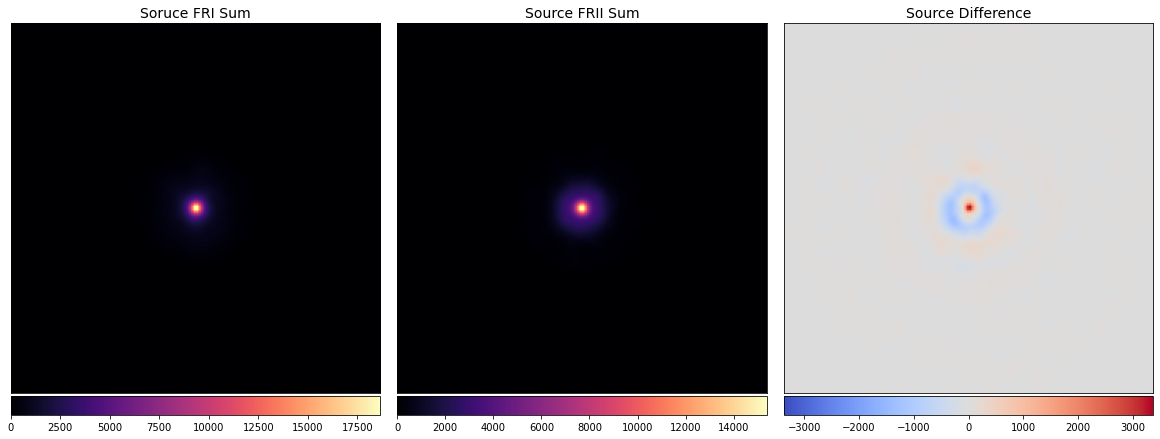

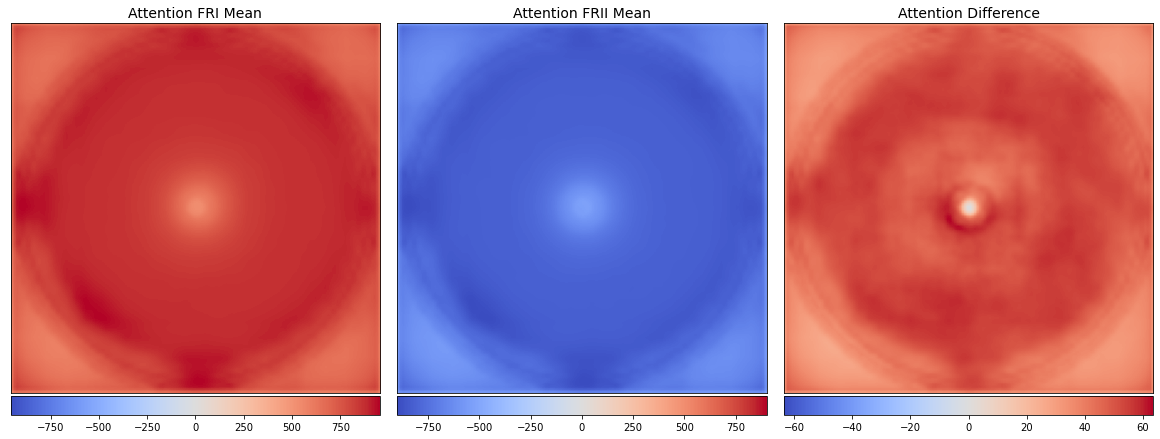

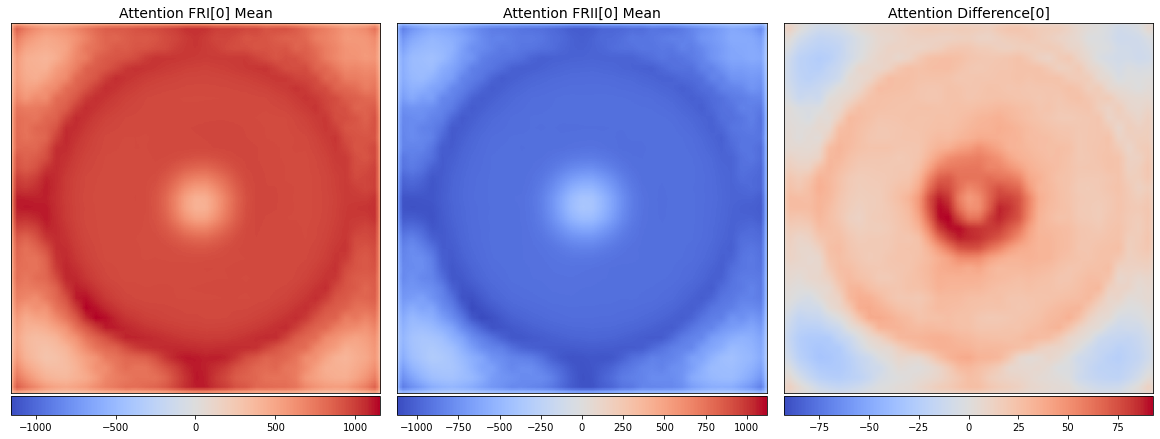

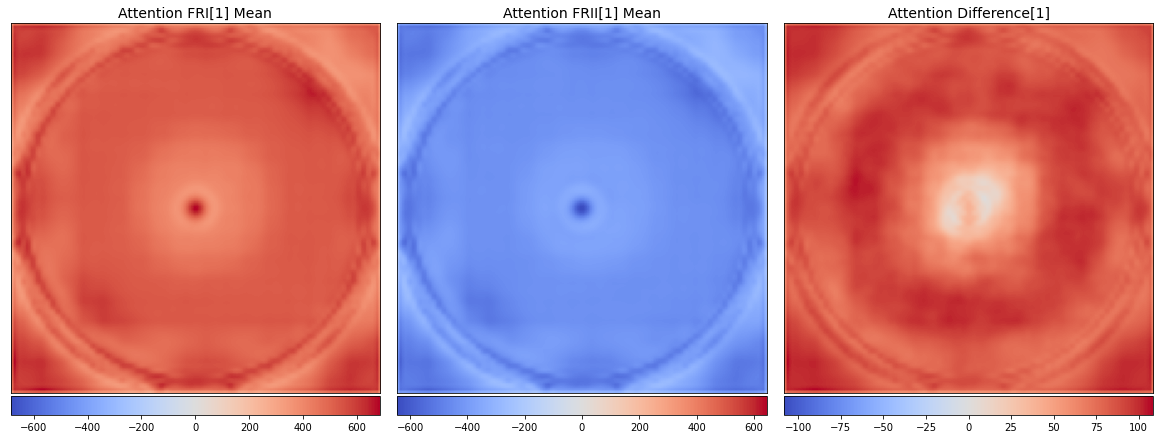

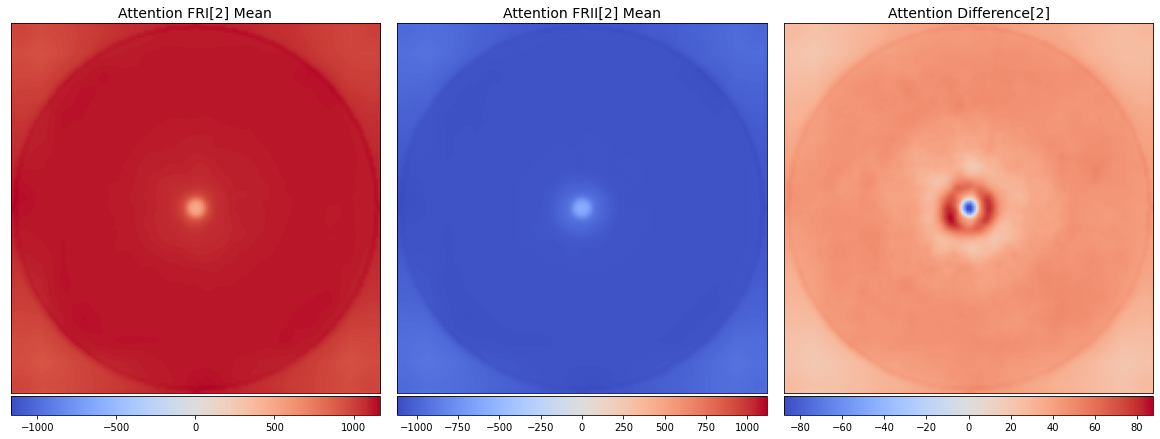

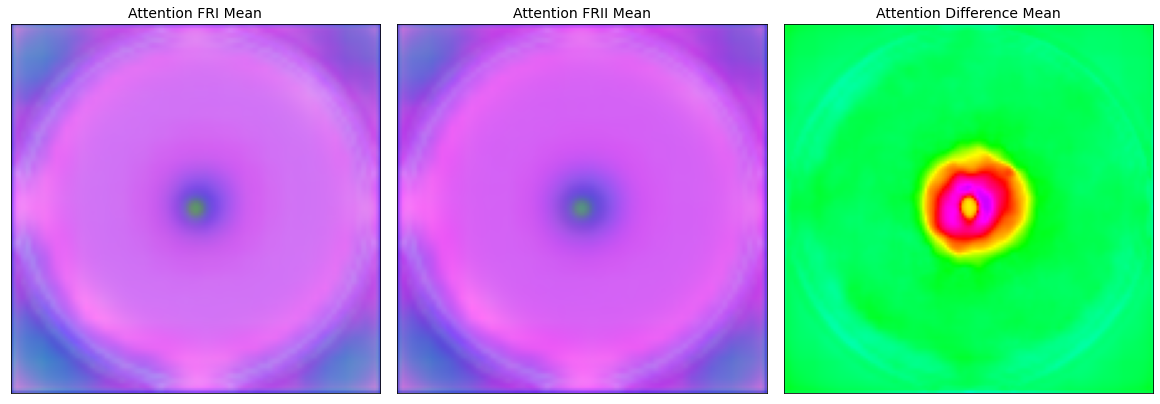

In [11]:
fri_source_sum, frii_source_sum, fr_source_diff = sums_and_diff(fri_sources, frii_sources)
fri_amap_sum, frii_amap_sum, fr_amap_diff = sums_and_diff(fri_amap, frii_amap)

# Source Differences
utils.utils.plot_3(
    fri_source_sum.squeeze(), frii_source_sum.squeeze(), fr_source_diff.squeeze(), 
    cmaps=['magma', 'magma', 'coolwarm'], titles=["Soruce FRI Sum", "Source FRII Sum", "Source Difference"], 
    cbars_bool=[True], figsize=(16,9), vmin=['zero', 'zero', 'adaptive'], factors=[1]
)

# Attention Map Differences
utils.utils.plot_3(fri_amap_sum.mean(0), frii_amap_sum.mean(0), fr_amap_diff.mean(0), cmaps=['coolwarm'], titles=["Attention FRI Mean", "Attention FRII Mean", "Attention Difference"], cbars_bool=[True], figsize=(16,9))
# Attention Map Differences by Gate
utils.utils.plot_3(fri_amap_sum[0],      frii_amap_sum[0],      fr_amap_diff[0],      cmaps=['coolwarm'], titles=["Attention FRI[0] Mean", "Attention FRII[0] Mean", "Attention Difference[0]"], cbars_bool=[True], figsize=(16,9))
utils.utils.plot_3(fri_amap_sum[1],      frii_amap_sum[1],      fr_amap_diff[1],      cmaps=['coolwarm'], titles=["Attention FRI[1] Mean", "Attention FRII[1] Mean", "Attention Difference[1]"], cbars_bool=[True], figsize=(16,9))
utils.utils.plot_3(fri_amap_sum[2],      frii_amap_sum[2],      fr_amap_diff[2],      cmaps=['coolwarm'], titles=["Attention FRI[2] Mean", "Attention FRII[2] Mean", "Attention Difference[2]"], cbars_bool=[True], figsize=(16,9))

# RGB Attention Map Differences
utils.utils.plot_3(fri_amap_sum.transpose(1,2,0), frii_amap_sum.transpose(1,2,0), fr_amap_diff.transpose(1,2,0), titles=["Attention FRI Mean", "Attention FRII Mean", "Attention Difference Mean"], cbars_bool=[False], figsize=(16,9), factors=[1])

### Attention Map by Epoch

Files already downloaded and verified
models/bowles2021/mirabest
torch.Size([5, 1, 150, 150])
Source images followed by their respective averaged attention maps at epochs:
[0, 87, 220, 311, 566, 832]


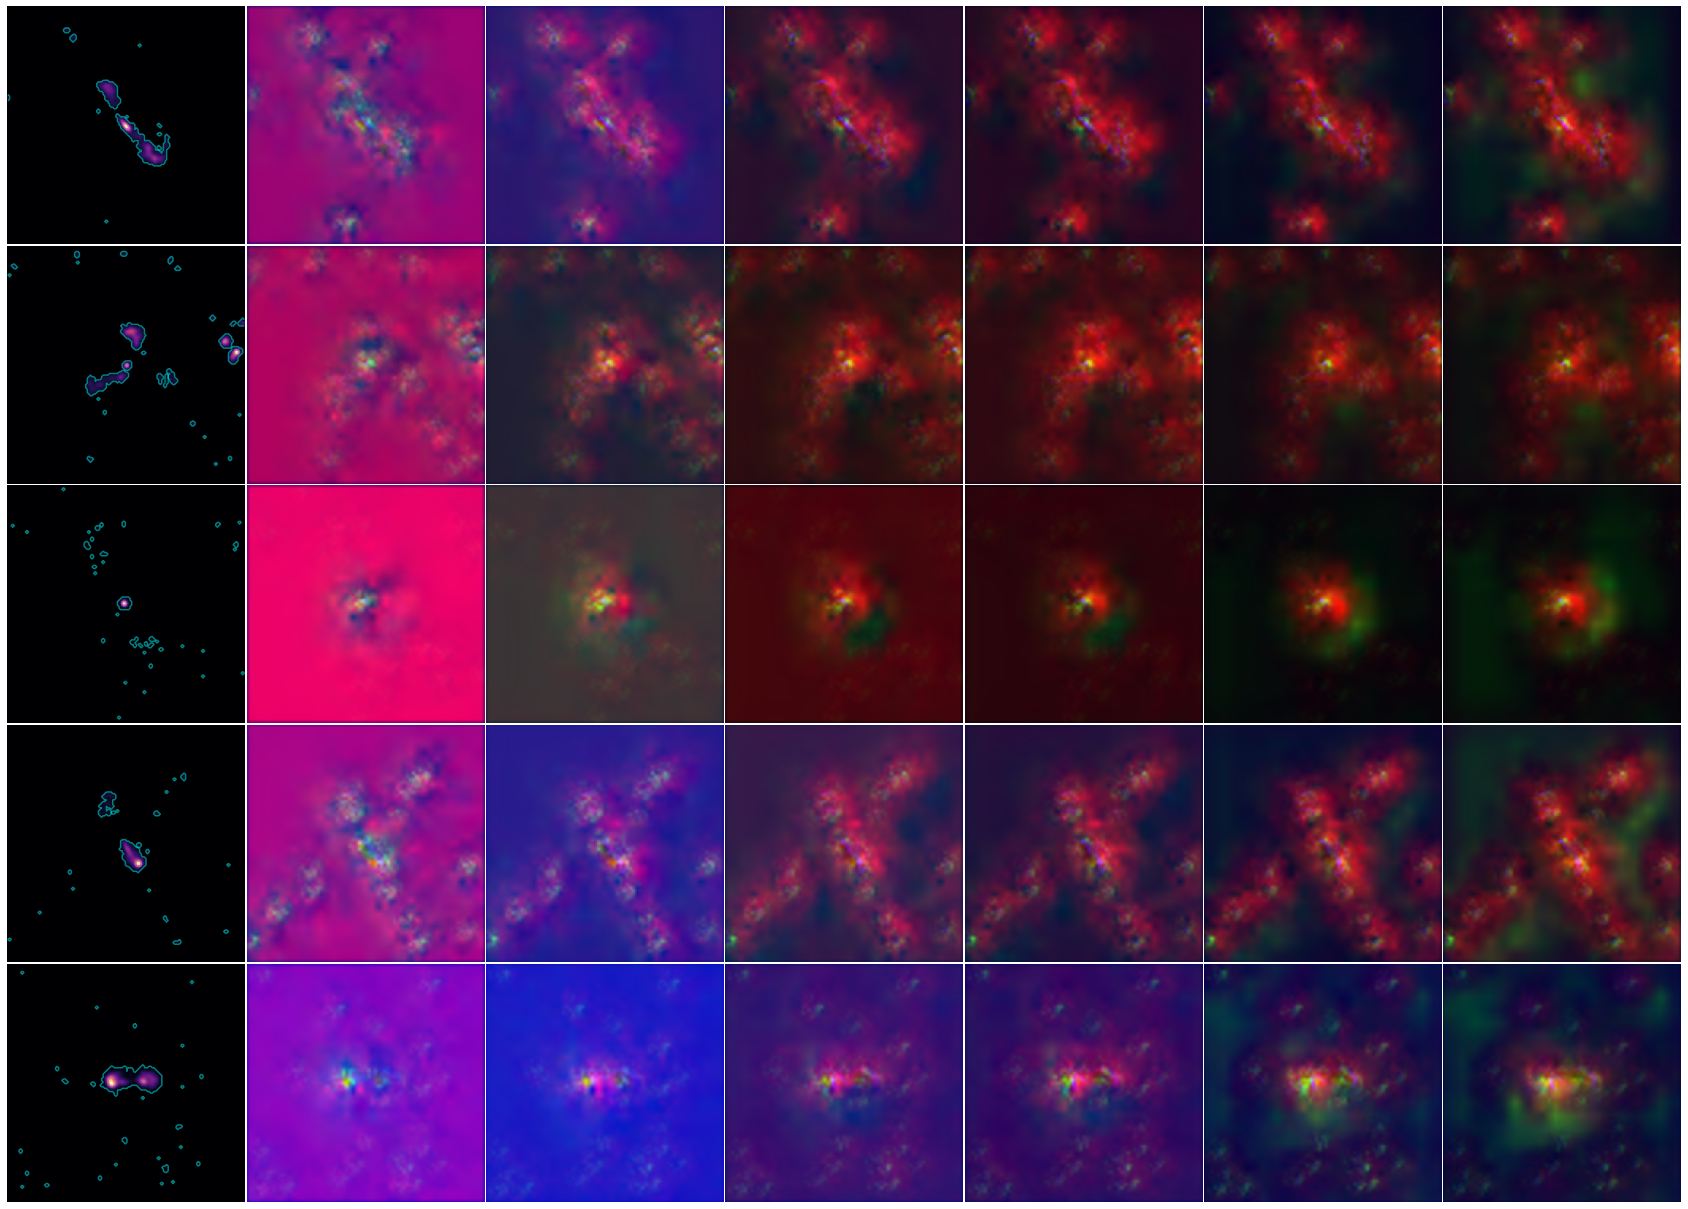

Files already downloaded and verified
models/e2attention/mirabest
torch.Size([5, 1, 150, 150])
Source images followed by their respective averaged attention maps at epochs:
[0, 383, 509, 591, 720, 1376]


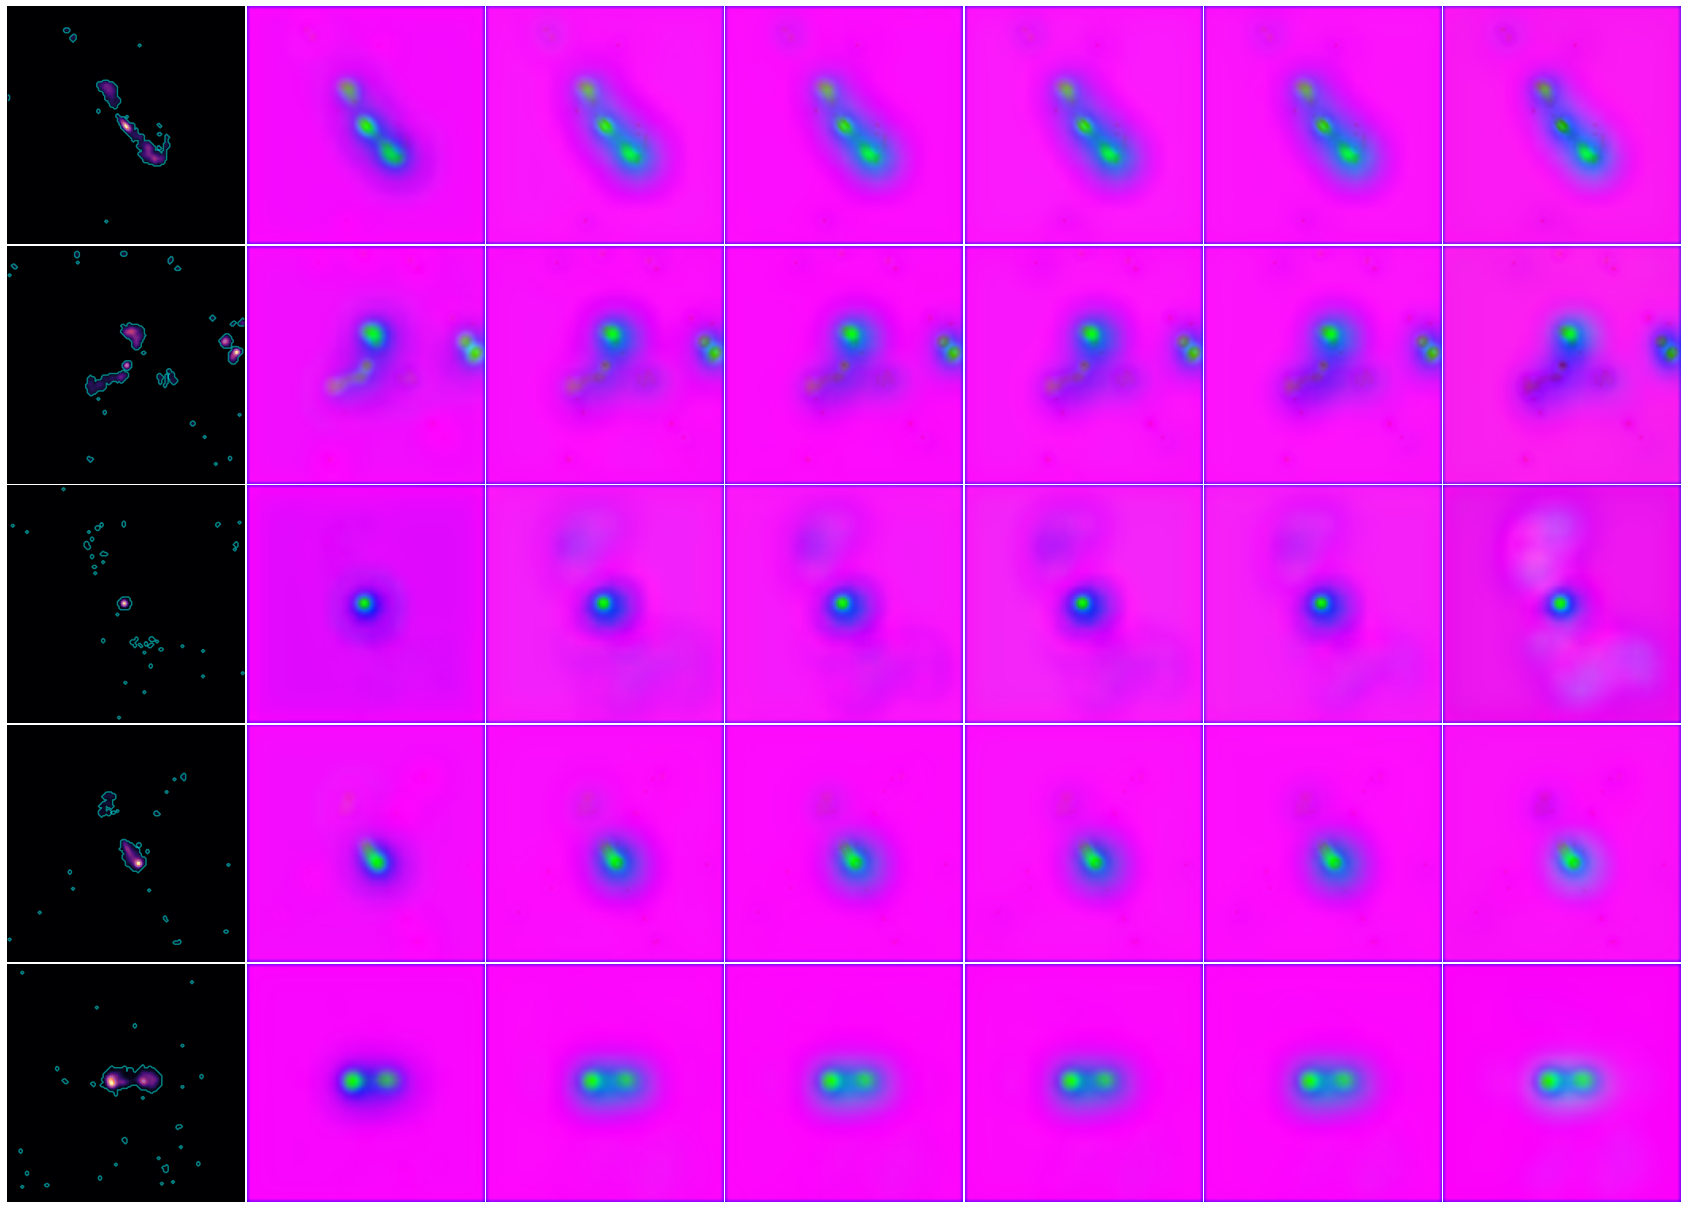

Files already downloaded and verified
models/bowles2021/mingo
torch.Size([5, 1, 150, 150])
Source images followed by their respective averaged attention maps at epochs:
[0, 33, 135, 213, 567, 1874]


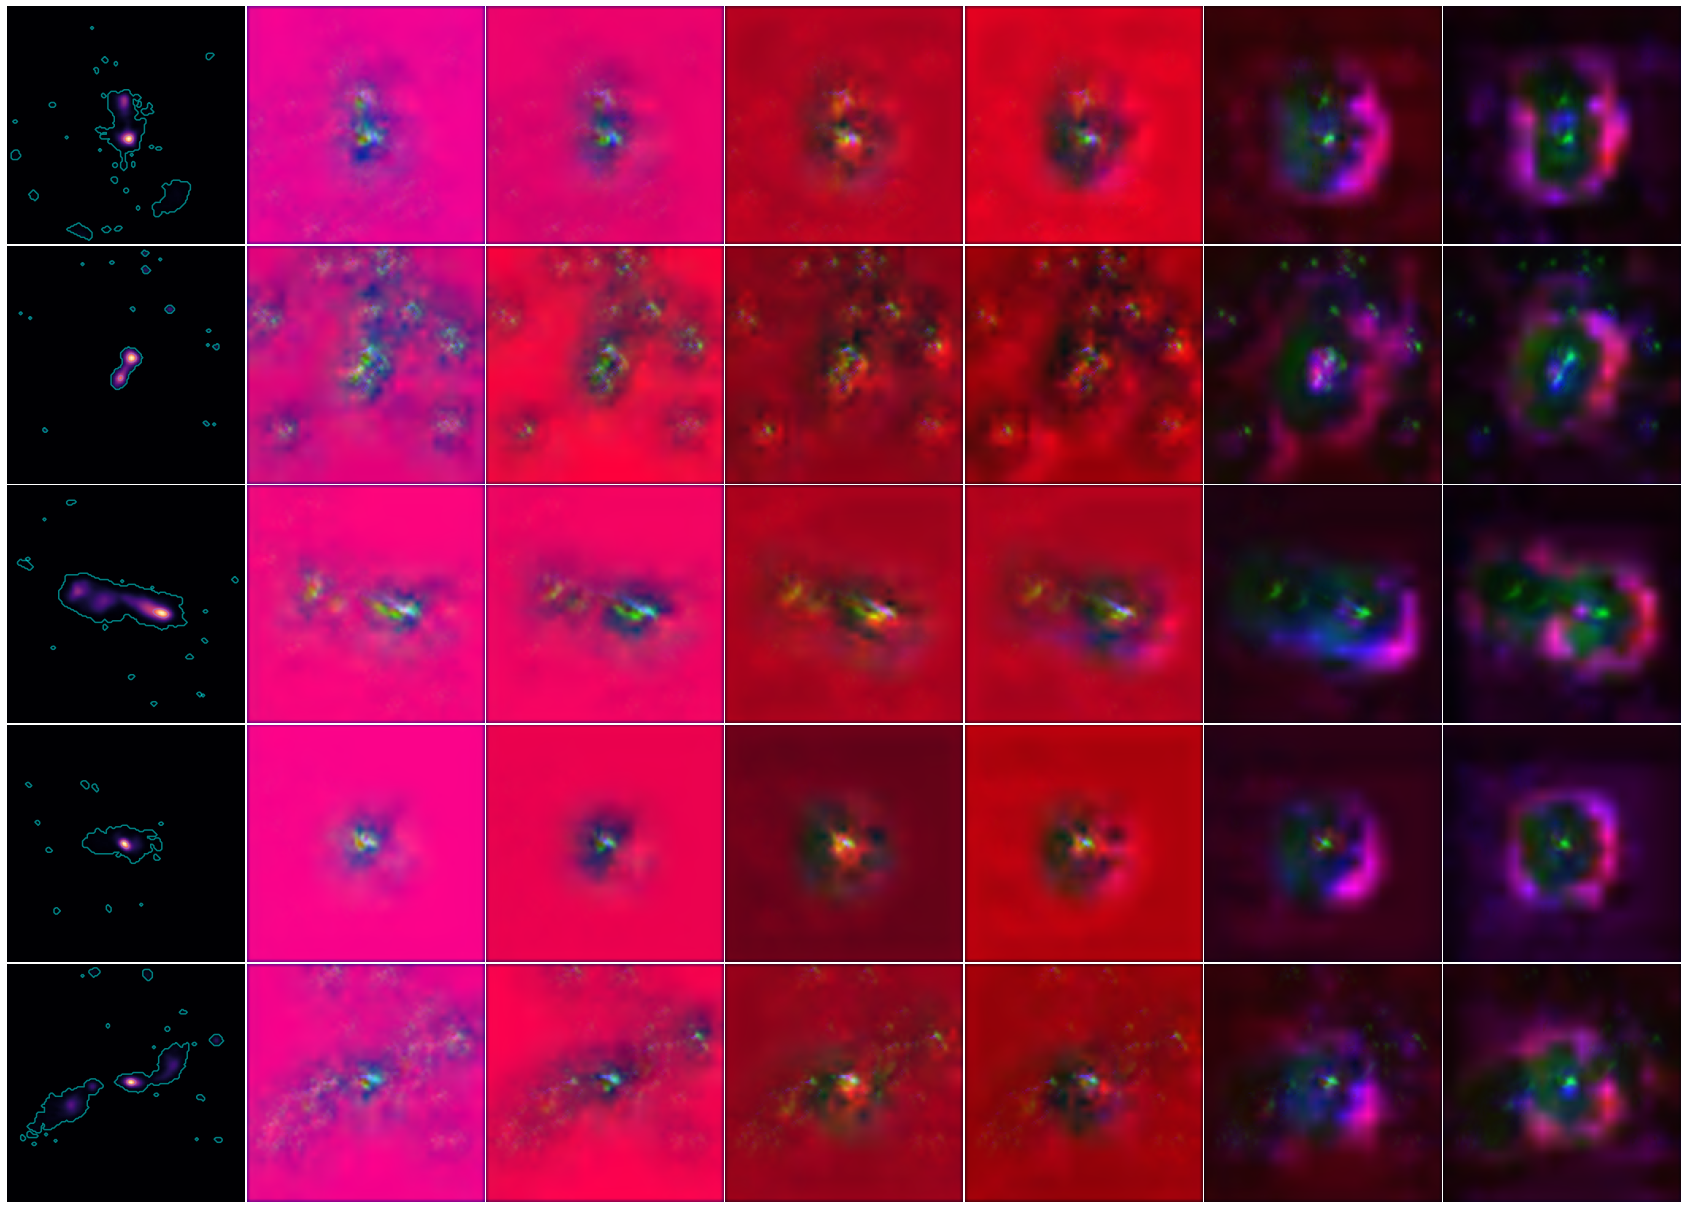

Files already downloaded and verified
models/e2attention/mingo
torch.Size([5, 1, 150, 150])
Source images followed by their respective averaged attention maps at epochs:
[0, 79, 84, 85, 91, 92]


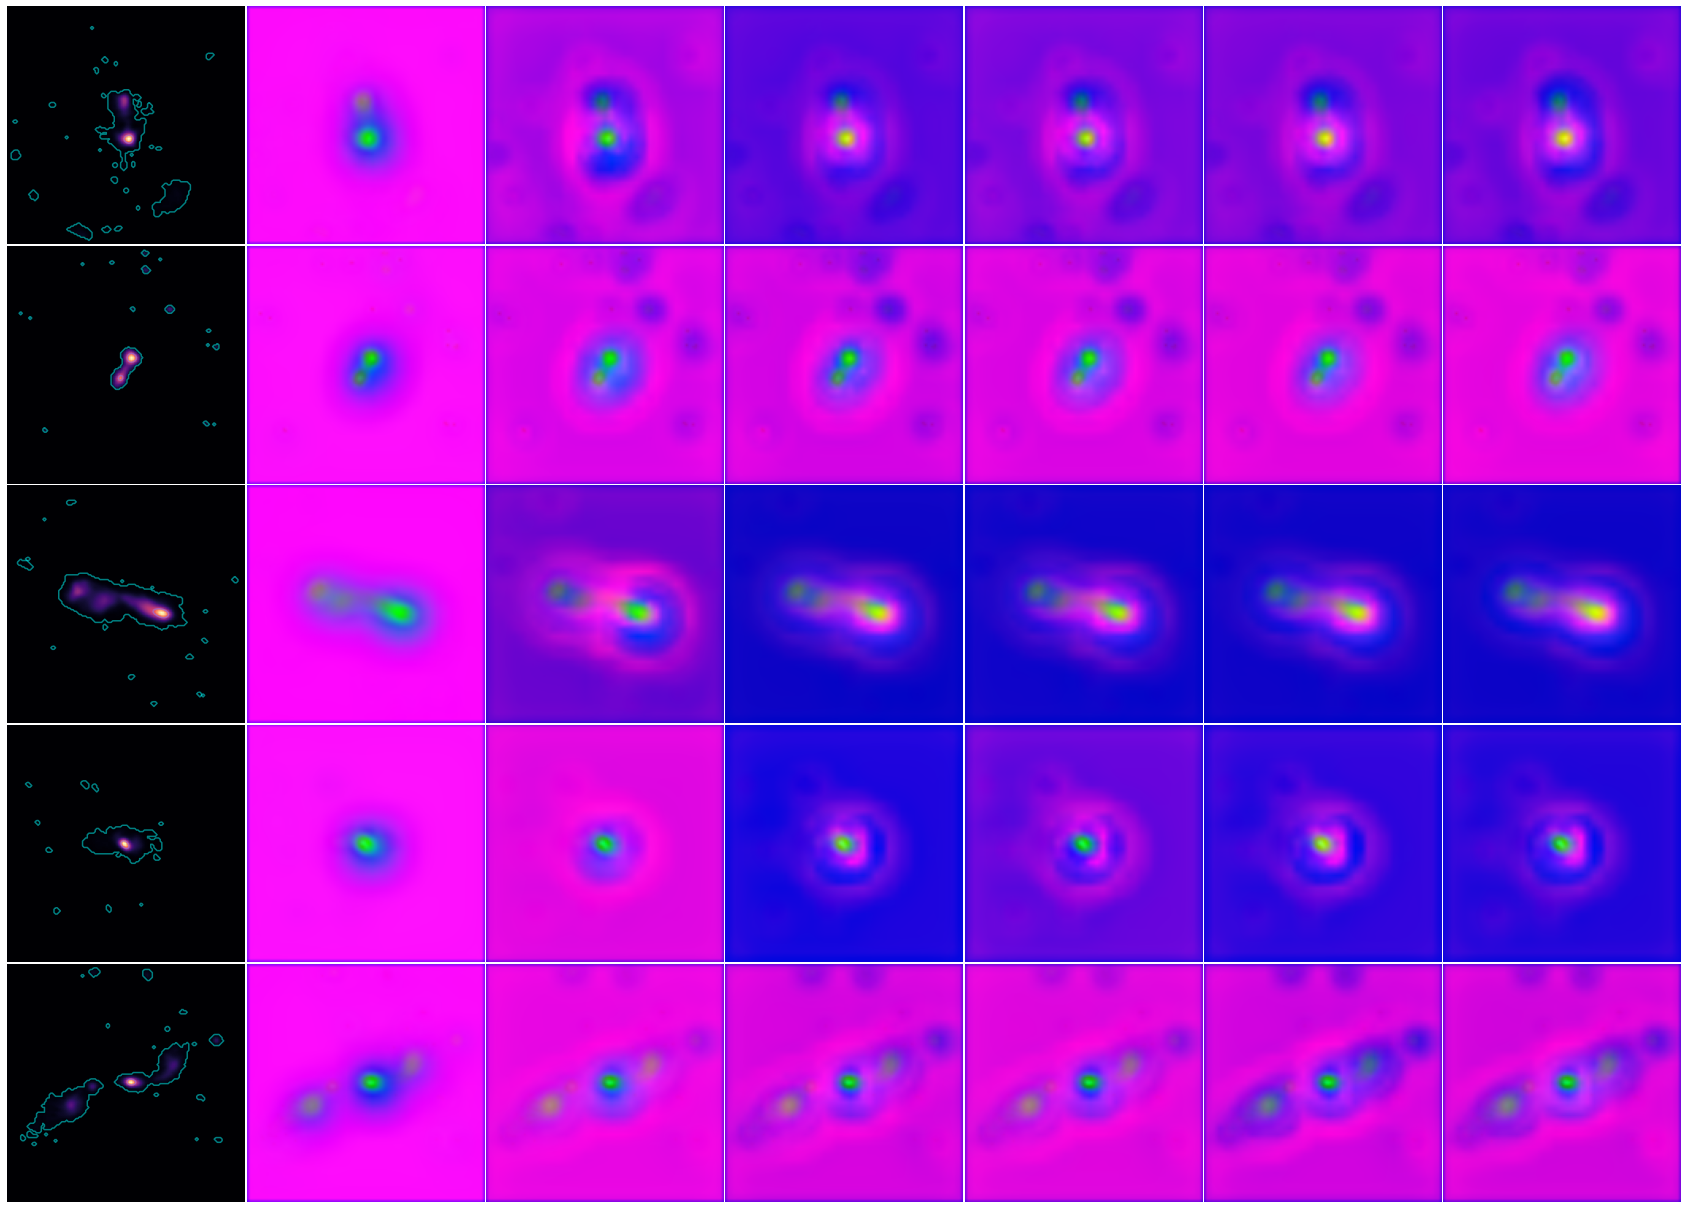

In [8]:
config_names = [
    "bowles2021mirabest.cfg",
    #"scaife2021mirabest.cfg",
    "e2attentionmirabest.cfg",
    
    "bowles2021mingo.cfg",
    #"scaife2021mingo.cfg", 
    "e2attentionmingo.cfg"
]

for cfg in config_names:
    config_name = "configs/"+cfg
    config = ConfigParser.ConfigParser(allow_no_value=True)
    config.read(config_name)

    # Load in model and data
    model = utils.utils.load_model(config, load_model='best', device=device)
    test_data = utils.data.load(config, train=False, augmentation='None', data_loader=False)

    # Extract attention map
    sources = test_data.data.transpose(0,3,1,2)
    
    # Attention by Epoch
    source_idxs = [3, 4, 5, 7, 9, 10, 17, 18, 22, 29]
    source_idxs = [3, 10, 18, 47, 48]
    first = True
    for idx, img in enumerate(sources):
        if idx in source_idxs:
            if first:
                first = False
                sources_ = torch.Tensor(img).view(-1,1,150,150)
            else:
                sources_ = torch.cat((sources_, torch.Tensor(img).view(-1,1,150,150)), dim=0)

    path_supliment = ''
    folder_name = config['output']['directory']
    print(folder_name)
    print(sources_.shape)

    # Change 'width' to see more of the development
    utils.attention.attention_epoch_plot(
        model,
        folder_name+path_supliment,
        sources_,
        width=6,
        device=device,
        layer_name_base='attention',
        layer_no=3,
        cmap_name='RGB',
        figsize=(30, 30)
    )

## Attention Maps for Selected Sources

In [13]:
def source_attention(
    config, 
    plot=None, 
    path_supliment='', 
    fontsize=14, 
    mean=True,
    RGB=False,
    device=torch.device('cpu')):
    """Plot attention maps for test set sources.
    """
    # Load in model and data
    model = utils.utils.load_model(config, load_model='best', device=device)
    test_data = utils.data.load(config, train=False, augmentation='None', data_loader=False)
    
    # Extract attention map
    sources = test_data.data.transpose(0,3,1,2)
    labels = np.asarray(test_data.targets)
    if RGB:
        mean_tmp = False
    else:
        mean_tmp = mean
    amap, amap_originals = utils.attention.attentions_func(
        sources, 
        model, 
        device=device, 
        layer_no=3, 
        layer_name_base='attention', 
        mean=mean_tmp)
    predictions=None
    
    plt.rcParams.update({'font.size': fontsize})
    # Plot sources
    if type(plot)==list:
        source_nos = plot
    elif plot=='all':
        source_nos = list(range(sources.shape[0]))
    
    if plot != None:
        sources = test_data.data.squeeze()
        source_nos.sort()
        for idx in source_nos:
            source = sources[idx]/255
            amap_   = amap[idx]
            amap_37 = amap_originals[idx*3+0]
            amap_75 = amap_originals[idx*3+1]
            amap_150 = amap_originals[idx*3+2]
            if RGB:
                amap_ = amap_.transpose(1,2,0)
                tmp = np.zeros((3, 150, 150))
                tmp37 = np.zeros((37, 37))
                tmp75 = np.zeros((75, 75))
                tmp150 = np.zeros((150, 150))
                amap_37 = np.stack((amap_37.squeeze(), tmp37, tmp37), axis=2)
                amap_75 = np.stack((tmp75, amap_75.squeeze(), tmp75), axis=2)
                amap_150 = np.stack((tmp150, tmp150, amap_150.squeeze()), axis=2) 

            plt.figure(figsize=(20,10))
            plt.tight_layout()

            plt.subplot(151)
            plt.title(f"Test Image {idx}")
            plt.imshow(source, origin='lower', cmap='magma',vmax=1,vmin=0)
            plt.contour(sources[idx], 1, cmap='cool', alpha=0.5)
            plt.xticks([])
            plt.yticks([])

            plt.subplot(152)
            plt.title(f"Averaged Attention")
            plt.imshow(amap_, origin='lower', cmap='magma', vmax=1,vmin=0)
            plt.xticks([])
            plt.yticks([])

            plt.subplot(153)
            plt.title(f"1st Attention Gate")
            plt.imshow(amap_37, origin='lower', cmap='magma', vmax=1,vmin=0)
            plt.yticks([])

            plt.subplot(154)
            plt.title(f"2nd Attention Gate")
            plt.imshow(amap_75, origin='lower', cmap='magma', vmax=1,vmin=0)
            plt.yticks([])

            plt.subplot(155)
            plt.title(f"3rd Attention Gate")
            plt.imshow(amap_150, origin='lower', cmap='magma', vmax=1,vmin=0)
            plt.yticks([])
            
            plt.show()
        
    return amap, amap_originals, test_data, predictions

configs/e2attentionmirabest.cfg
Files already downloaded and verified


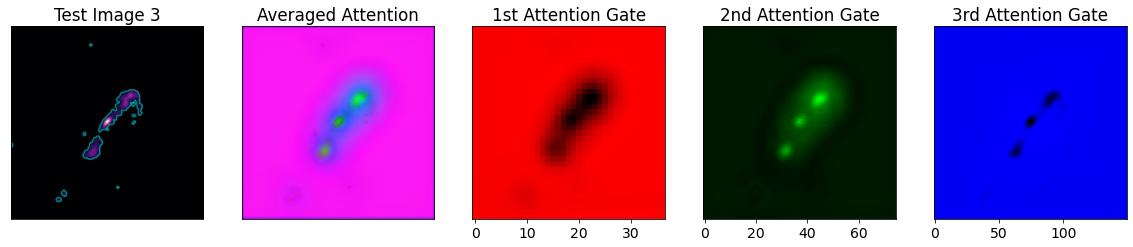

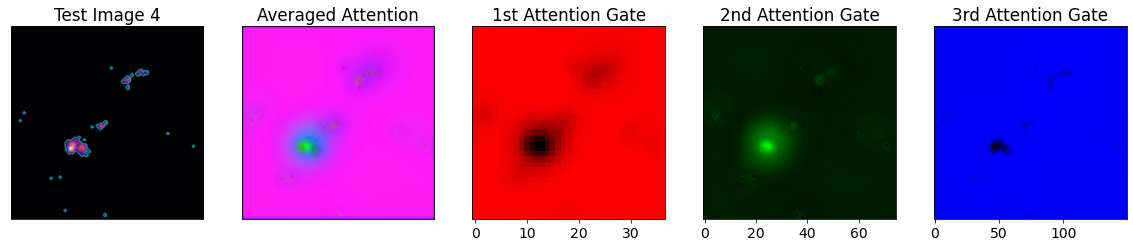

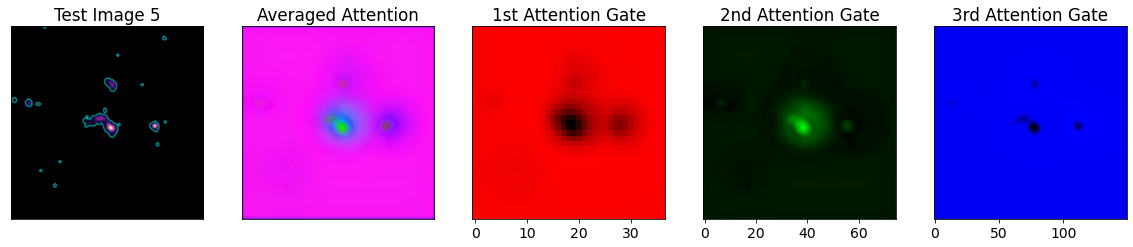

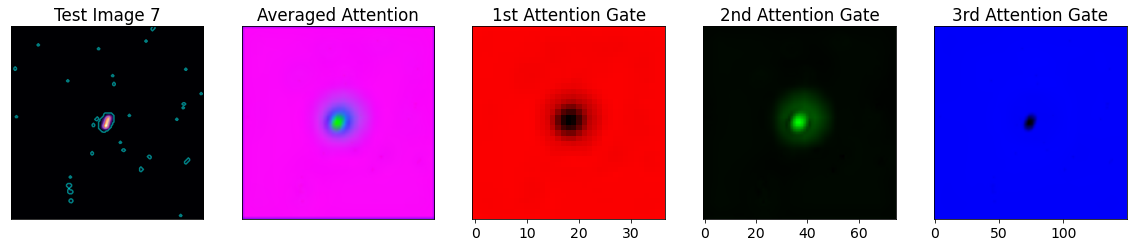

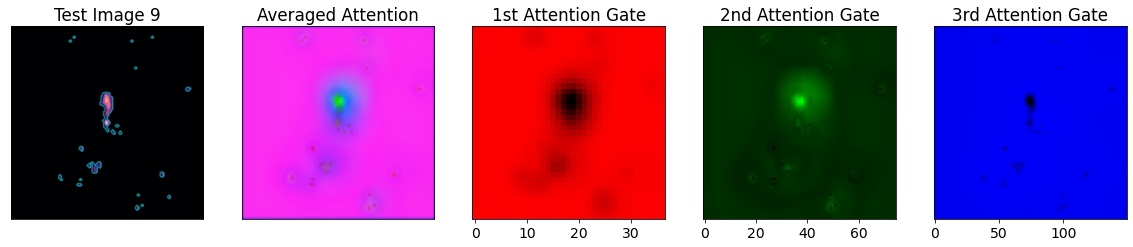

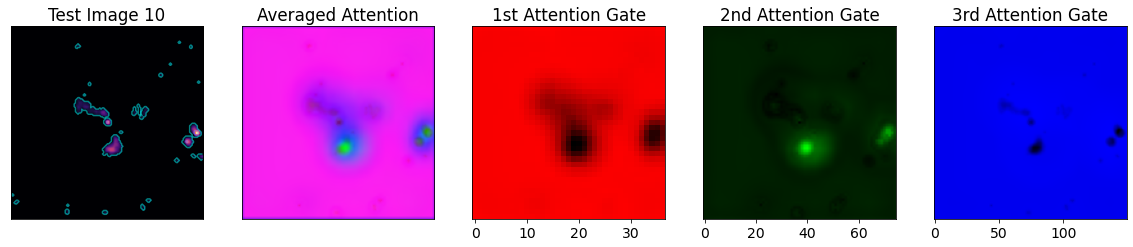

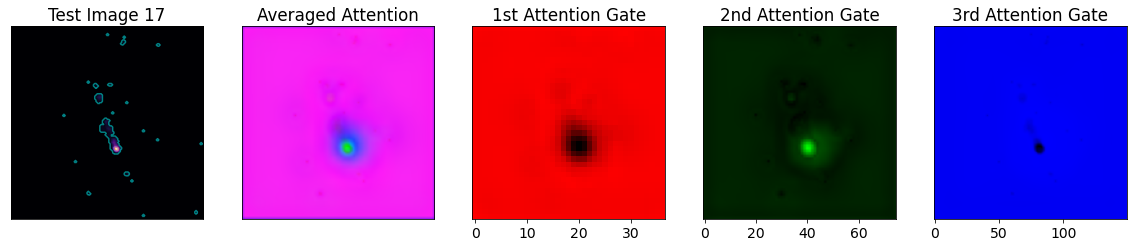

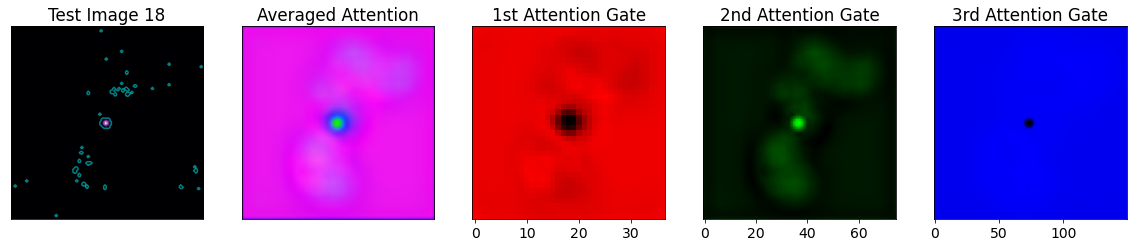

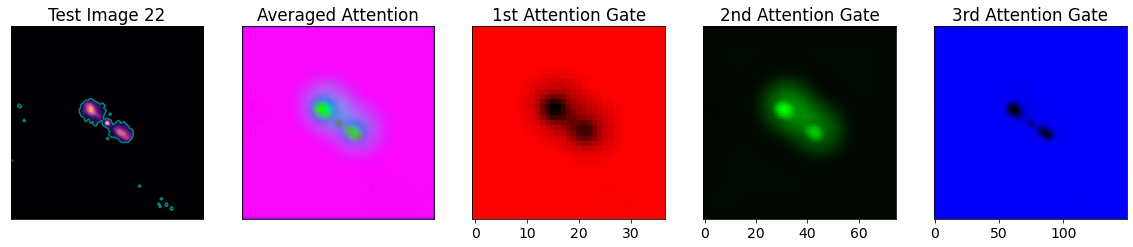

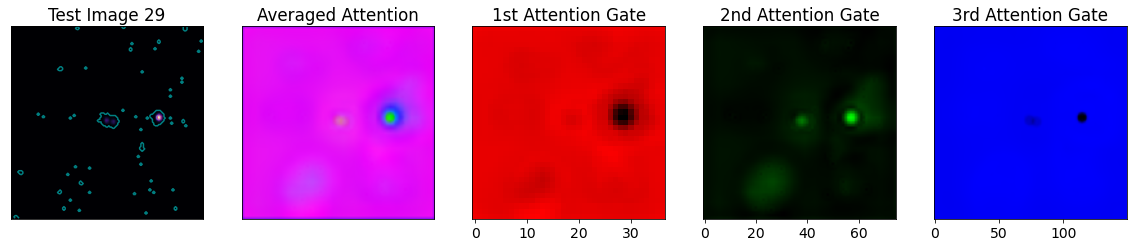

configs/e2attentionmingo.cfg
Files already downloaded and verified


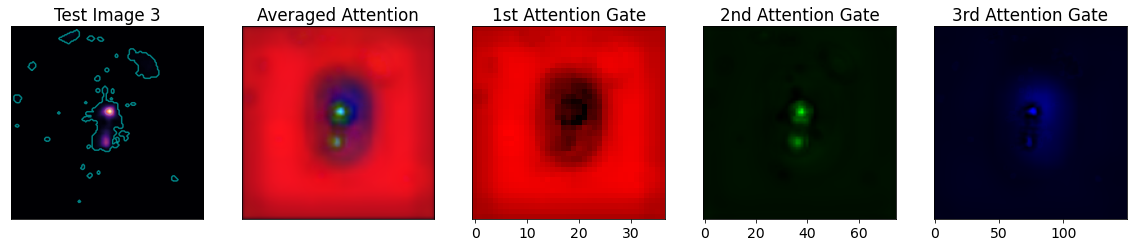

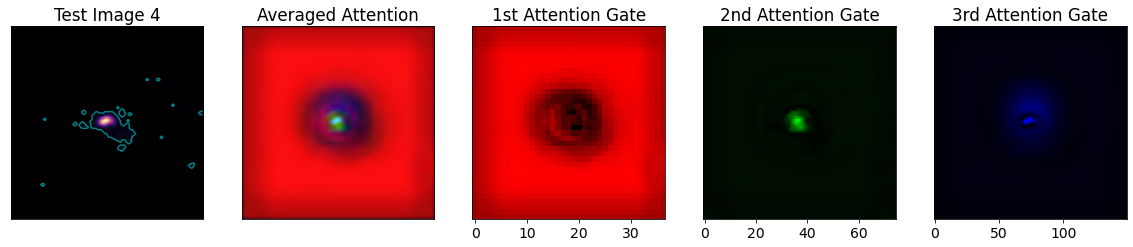

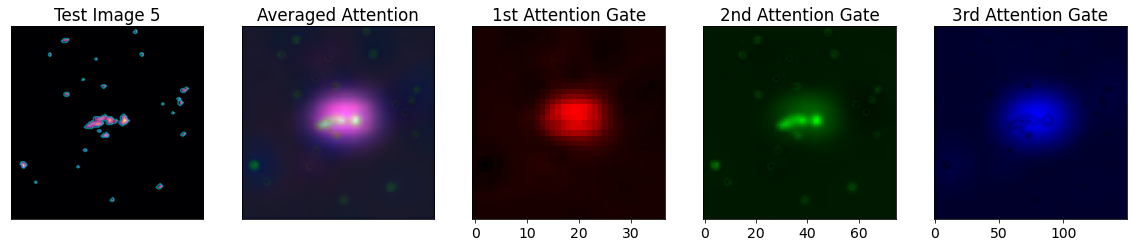

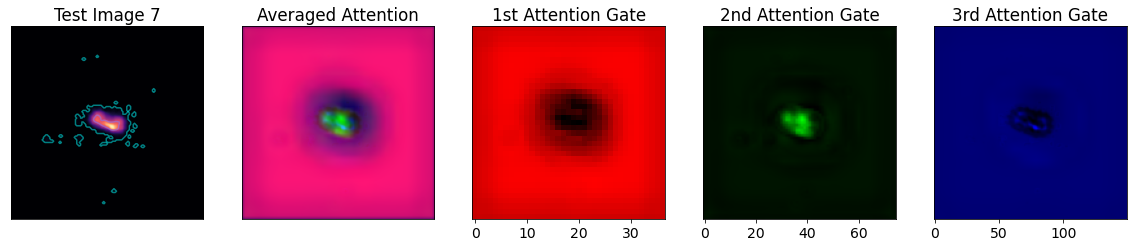

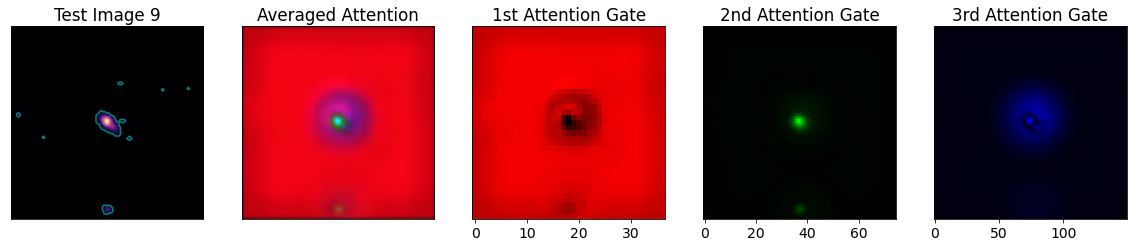

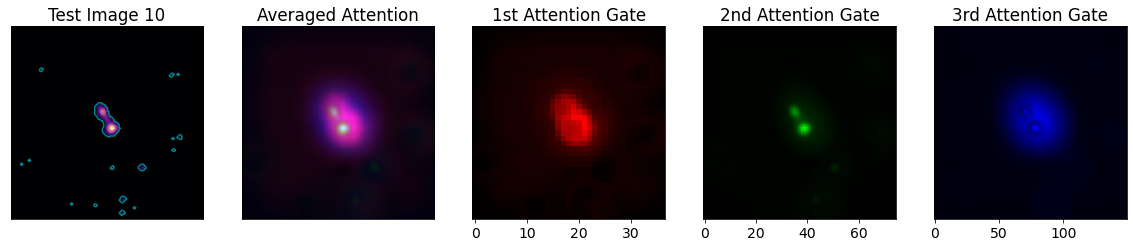

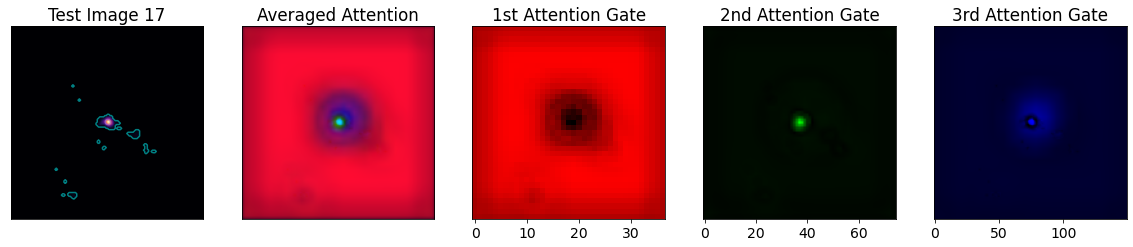

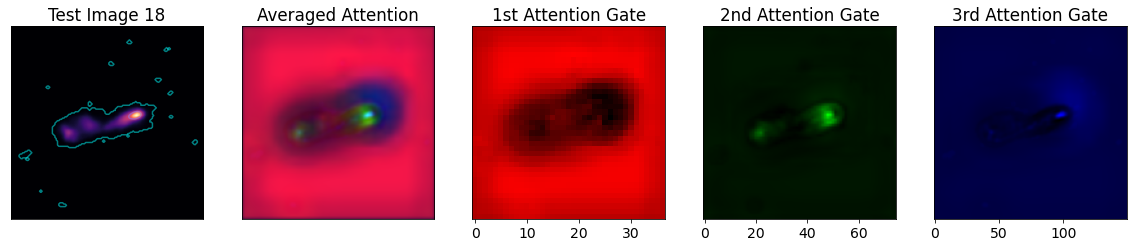

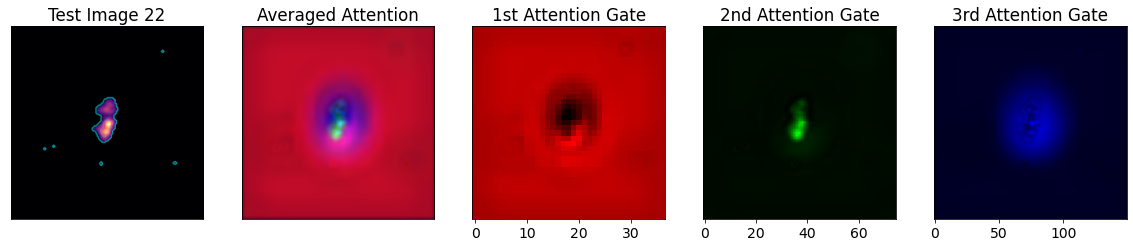

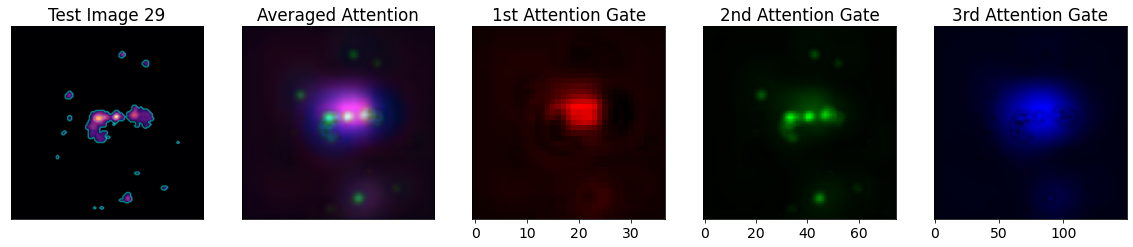

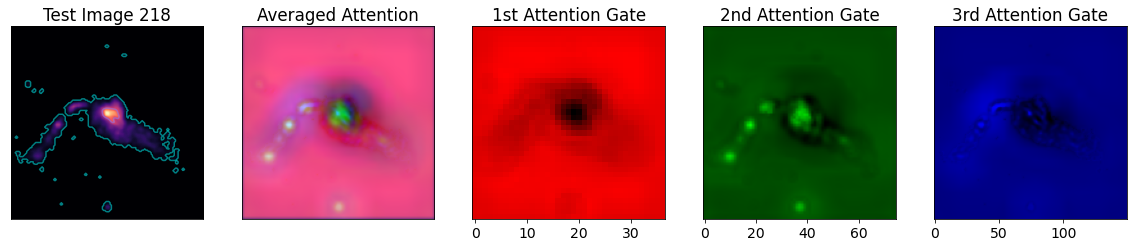

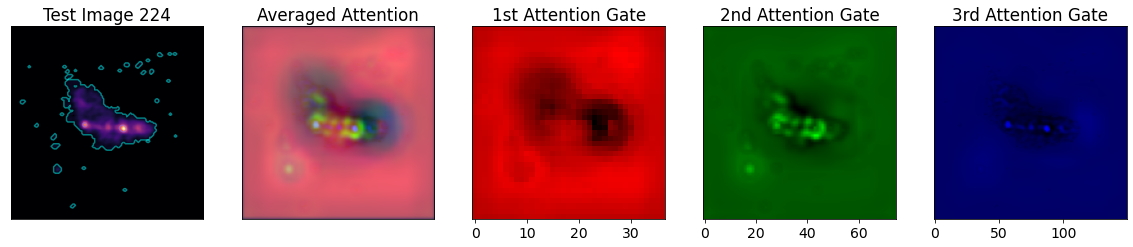

configs/e2attentionmirabest-RandAug.cfg
Files already downloaded and verified


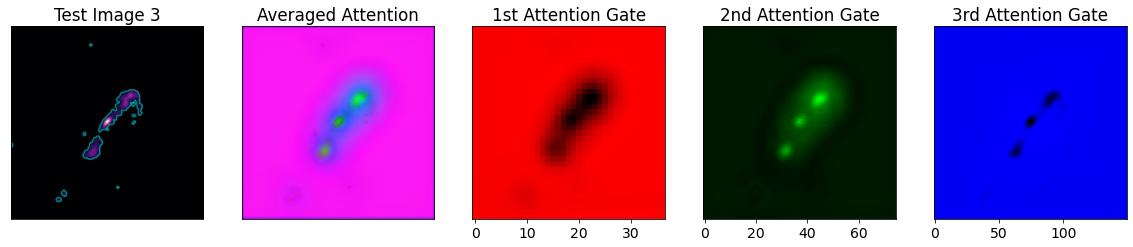

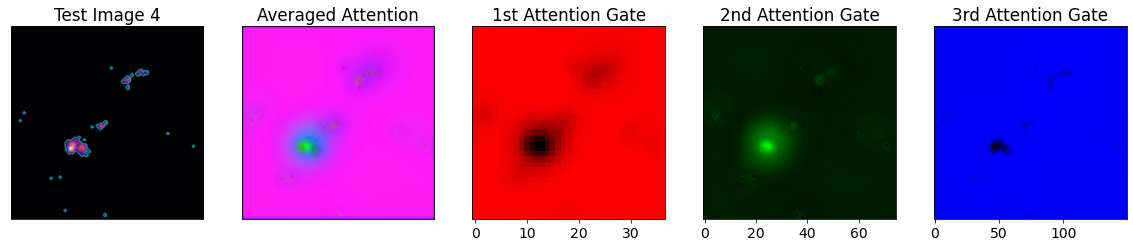

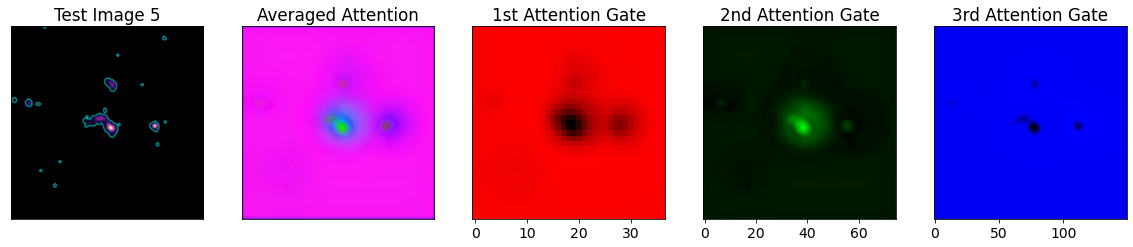

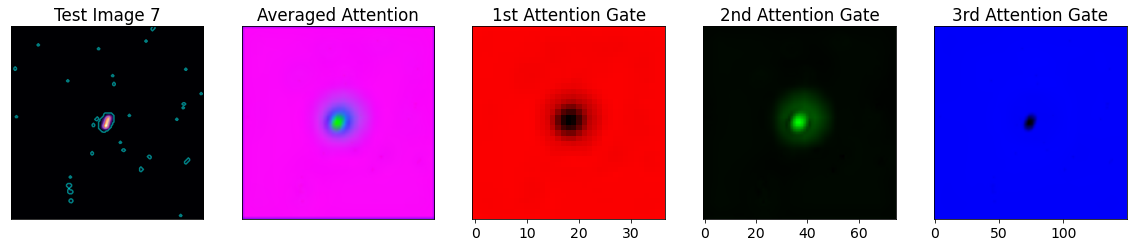

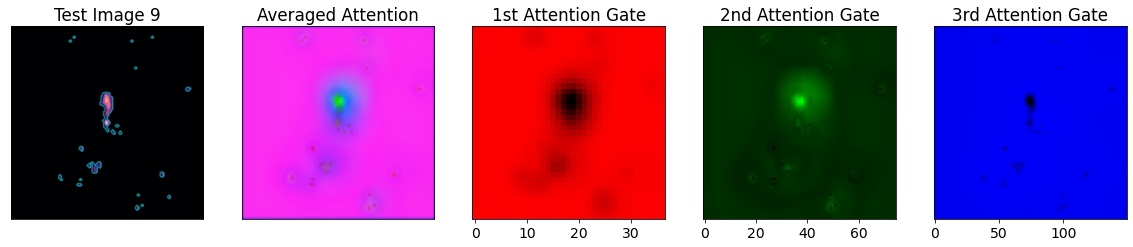

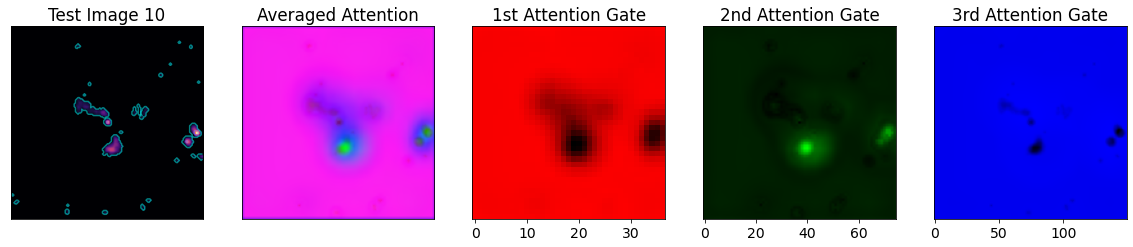

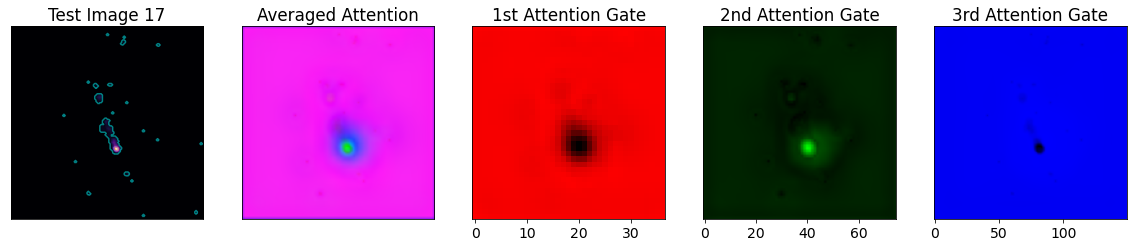

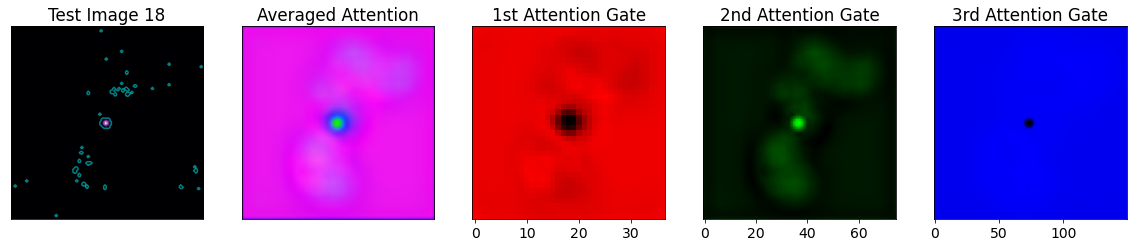

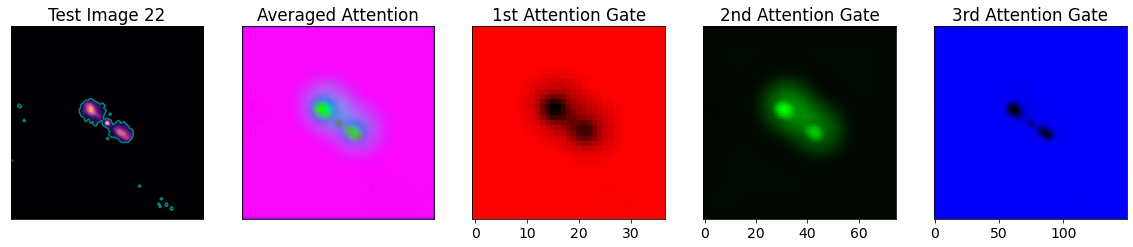

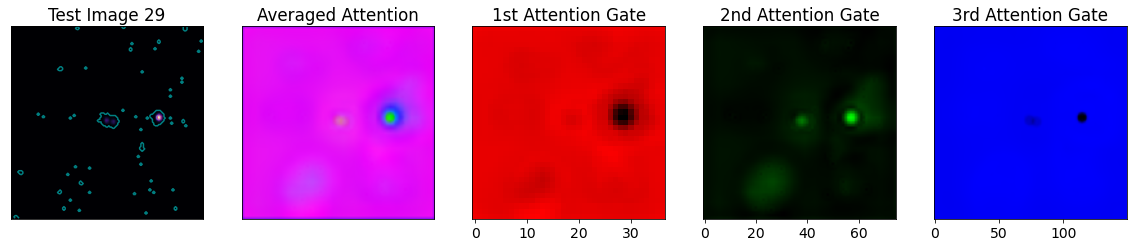

In [14]:
config_names = [
    #"bowles2021mirabest.cfg",
    #"scaife2021mirabest.cfg",
    "e2attentionmirabest.cfg",
    
    #"bowles2021mingo.cfg",
    #"scaife2021mingo.cfg", 
    "e2attentionmingo.cfg",
    
    "e2attentionmirabest-RandAug.cfg"
]

#plot = 'all'
plot = [3, 4, 5, 7, 9, 10, 17, 18, 22, 29]

for config_name in config_names:
    if 'mingo' in config_name and type(plot)==list:
        plot+=[218, 224]
        
    config_name = "configs/"+config_name
    print(config_name)
    config = ConfigParser.ConfigParser(allow_no_value=True)
    config.read(config_name)
    
    imap, fmap, test_data, predictions = source_attention(config, path_supliment="", plot=plot, fontsize=14, RGB=True, device=device)
    if 'mingo' in config_name and type(plot)==list:
        plot = plot[:-2]